In [56]:
"""
@author Valentina Salamanca 
"""
import pandas as pd
from textblob import TextBlob
import re


df=pd.read_csv('twitterdataset.csv')
print(df.head(10))

                                       SentimentText
0                       is so sad for my APL friend.
1                   I missed the New Moon trailer...
2                            omg its already 7:30 :O
3  Omgaga. Im sooo  im gunna CRy. I've been at th...
4                  or i just worry too much?        
5                 Juuuuuuuuuuuuuuuuussssst Chillin!!
6    handed in my uniform today . i miss you already
7                      I must think about positive..
8    thanks to all the haters up in my face all day!
9                     this weekend has sucked so far


In [59]:
def cleantext(SentimentText):
  SentimentText = re.sub(r'^RT[\s]+', '', SentimentText)
  SentimentText = re.sub(r'https?:\/\/.[\r\n]', '', SentimentText)
  SentimentText = re.sub(r'#', '', SentimentText)
  SentimentText = re.sub(r'@[A-Za-z0-9]+', '', SentimentText)
  return SentimentText

df['cleantext'] = df['SentimentText'].apply(cleantext)
df.head(250)

,SentimentText,cleantext
0,is so sad for my APL friend.,is so sad for my APL friend.
1,I missed the New Moon trailer...,I missed the New Moon trailer...
2,omg its already 7:30 :O,omg its already 7:30 :O
3,Omgaga. Im sooo im gunna CRy. I've been at th...,Omgaga. Im sooo im gunna CRy. I've been at th...
4,or i just worry too much?,or i just worry too much?
5,Juuuuuuuuuuuuuuuuussssst Chillin!!,Juuuuuuuuuuuuuuuuussssst Chillin!!
6,handed in my uniform today . i miss you already,handed in my uniform today . i miss you already
7,I must think about positive..,I must think about positive..
8,thanks to all the haters up in my face all day!,thanks to all the haters up in my face all day!
9,this weekend has sucked so far,this weekend has sucked so far


In [121]:
def pol_sub(SentimentText):
 text = TextBlob(SentimentText)
 if SentimentText != '':
  result = text.sentiment
  return result
  
df['polarity'] = df['cleantext'].apply(pol_sub).apply(lambda x: x[0])
df['subjectivity'] = df['cleantext'].apply(pol_sub).apply(lambda x: x[1])
df.head(250)



,SentimentText,cleantext,polarity,subjectivity,result of polarity,result of subjectivity
0,is so sad for my APL friend.,is so sad for my APL friend.,-0.500000,1.000000,-1,1
1,I missed the New Moon trailer...,I missed the New Moon trailer...,0.136364,0.454545,1,1
2,omg its already 7:30 :O,omg its already 7:30 :O,0.050000,1.000000,1,1
3,Omgaga. Im sooo im gunna CRy. I've been at th...,Omgaga. Im sooo im gunna CRy. I've been at th...,0.000000,0.000000,0,0
4,or i just worry too much?,or i just worry too much?,0.200000,0.200000,1,1
...,...,...,...,...,...,...
245,going to master classes without my car... I m...,going to master classes without my car... I m...,0.000000,0.000000,0,0
246,"- goingg to sleep school , then out for pizzaa!","- goingg to sleep school , then out for pizzaa!",0.000000,0.000000,0,0
247,good luck!!,good luck!!,1.000000,0.600000,1,1
248,good morning lovely!,good morning lovely!,0.662500,0.675000,1,1


In [122]:
def x_range(x):
  if x > 0:
    return 1
  elif x == 0:
    return 0
  else:
    return -1

df['result of polarity'] = df['polarity'].apply(x_range)
df['result of subjectivity'] = df['subjectivity'].apply(x_range)
df.head(250)

,SentimentText,cleantext,polarity,subjectivity,result of polarity,result of subjectivity
0,is so sad for my APL friend.,is so sad for my APL friend.,-0.500000,1.000000,-1,1
1,I missed the New Moon trailer...,I missed the New Moon trailer...,0.136364,0.454545,1,1
2,omg its already 7:30 :O,omg its already 7:30 :O,0.050000,1.000000,1,1
3,Omgaga. Im sooo im gunna CRy. I've been at th...,Omgaga. Im sooo im gunna CRy. I've been at th...,0.000000,0.000000,0,0
4,or i just worry too much?,or i just worry too much?,0.200000,0.200000,1,1
...,...,...,...,...,...,...
245,going to master classes without my car... I m...,going to master classes without my car... I m...,0.000000,0.000000,0,0
246,"- goingg to sleep school , then out for pizzaa!","- goingg to sleep school , then out for pizzaa!",0.000000,0.000000,0,0
247,good luck!!,good luck!!,1.000000,0.600000,1,1
248,good morning lovely!,good morning lovely!,0.662500,0.675000,1,1


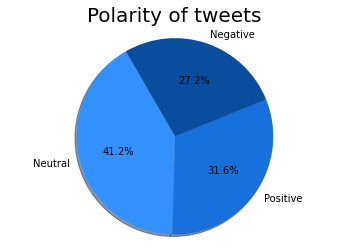

In [123]:
import matplotlib.pyplot as plt

labels = 'Neutral', 'Positive', 'Negative'
colors = ['#3390FF','#1771DC','#094D9E']
plt.pie(df['result of polarity'].value_counts(), labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 120)
plt.title('Polarity of tweets', fontsize = 20)
plt.axis('equal')
plt.show()



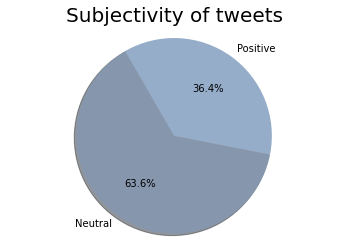

In [124]:

labels = 'Neutral', 'Positive'
colors = ['#8596AD','#96ADCA']
plt.pie(df['result of subjectivity'].value_counts(), labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 120)
plt.title('Subjectivity of tweets', fontsize = 20)
plt.axis('equal')
plt.show()

In [126]:
from wordcloud import WordCloud
text = ' '.join(df.cleantext)
text

" is so sad for my APL friend. I missed the New Moon trailer...  omg its already 7:30 :O Omgaga. Im sooo  im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on or i just worry too much?         Juuuuuuuuuuuuuuuuussssst Chillin!!  handed in my uniform today . i miss you already  I must think about positive..  thanks to all the haters up in my face all day! this weekend has sucked so far  jb isnt showing in australia any more! ok thats it you win. the man.... I'm completely useless rt now. Funny, all I can do is twitter. http://myloc.me/27HX Feeling strangely fine. Now I'm gonna go listen to some Semisonic to celebrate  I just cut my beard off. It's only been growing for well over a year. I'm gonna start it over.  is happy in the meantime.  Very sad about Iran. You're the only one who can see this cause no one else is following me this is for you because you're pretty awesome  BoRinG   ): whats wrong with him??     Please tell me........   :-/ can't b

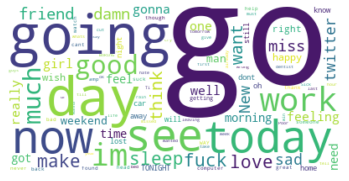

In [133]:
wordcloud = WordCloud(max_font_size=1000, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()